Building a program that uses the dual moving average crossover to determine when to buy and sell stocks
Trading strategies are usually verified by back testing: you reconstruct, with historical data, trades that would have occurred in the past using the rules that are defined with the strategy that you have developed.

This way, you can get an idea of the effectiveness of your strategy, and you can use it as a starting point to optimize and improve your strategy before applying it to real markets.

This relies heavily on the underlying theory or belief that any strategy that has worked out well in the past will likely also work out well in the future.

And any strategy that has performed poorly in the past will probably also do badly in the future.

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [156]:
df=pd.read_csv('FB.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-02,239.000000,240.000000,232.610001,233.419998,233.419998,30633600
1,2020-07-06,233.759995,240.399994,232.270004,240.279999,240.279999,26206200
2,2020-07-07,239.410004,247.649994,238.820007,240.860001,240.860001,27887800
3,2020-07-08,238.110001,246.990005,236.589996,243.580002,243.580002,29791300
4,2020-07-09,245.000000,246.529999,239.240005,244.500000,244.500000,22174900


In [157]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-06-28,342.459991,358.140015,341.769989,355.640015,355.640015,29115200
249,2021-06-29,356.269989,356.739990,349.049988,351.890015,351.890015,21417300
250,2021-06-30,352.170013,352.920013,347.170013,347.709991,347.709991,15107500
251,2021-07-01,346.820007,354.670013,346.500000,354.390015,354.390015,17124000
252,2021-07-02,355.100006,356.440002,352.619995,353.940002,353.940002,8100674


In [158]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [159]:
df['Date']=pd.to_datetime(df['Date'])

In [160]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [161]:
data=df.groupby('Date')[['Open','High','Low','Close','Adj Close','Volume']].sum()
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-02,239.000000,240.000000,232.610001,233.419998,233.419998,30633600
2020-07-06,233.759995,240.399994,232.270004,240.279999,240.279999,26206200
2020-07-07,239.410004,247.649994,238.820007,240.860001,240.860001,27887800
2020-07-08,238.110001,246.990005,236.589996,243.580002,243.580002,29791300
2020-07-09,245.000000,246.529999,239.240005,244.500000,244.500000,22174900


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-07-02 to 2021-07-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [163]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,281.173992,285.045653,277.498419,281.249407,281.249407,2.029577e+07
std,27.878643,27.801317,28.130752,28.225418,28.225418,8.511514e+06
min,230.190002,233.490005,226.899994,230.119995,230.119995,6.702000e+06
25%,262.309998,266.709991,259.399994,263.109985,263.109985,1.510750e+07
50%,274.529999,277.899994,270.049988,273.880005,273.880005,1.835130e+07
75%,300.160004,302.920013,296.600006,301.470001,301.470001,2.329970e+07
max,356.269989,358.140015,352.619995,355.640015,355.640015,7.276640e+07


In [164]:
data.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,239.186667,242.542858,235.380953,239.290952,239.290952,2.258095e+07
2020-08-31,267.152382,273.099050,264.489523,268.785717,268.785717,2.734472e+07
2020-09-30,267.916190,271.646667,262.502383,266.551905,266.551905,2.376740e+07
2020-10-31,270.589999,274.084091,266.483183,269.780910,269.780910,2.064098e+07
2020-11-30,276.386000,279.533002,272.281502,276.306499,276.306499,1.783858e+07
2020-12-31,276.440456,280.012271,272.653182,276.530907,276.530907,1.654095e+07
2021-01-31,266.191054,269.927371,261.123685,264.609474,264.609474,2.382279e+07
2021-02-28,265.948419,269.660527,262.852104,266.337894,266.337894,1.672501e+07
2021-03-31,274.699129,280.150867,271.381304,275.506957,275.506957,2.162681e+07


In [165]:
data.resample('Y').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,266.312993,270.187717,262.334332,266.237717,266.237717,2.143566e+07
2021-12-31,296.152936,300.021508,292.782856,296.380238,296.380238,1.914683e+07


In [166]:
daily_close=data['Adj Close']
daily_close.head()

Date
2020-07-02    233.419998
2020-07-06    240.279999
2020-07-07    240.860001
2020-07-08    243.580002
2020-07-09    244.500000
Name: Adj Close, dtype: float64

In [167]:
#return as the fraction
daily_returns=daily_close.pct_change()
daily_returns.head()

Date
2020-07-02         NaN
2020-07-06    0.029389
2020-07-07    0.002414
2020-07-08    0.011293
2020-07-09    0.003777
Name: Adj Close, dtype: float64

In [168]:
#replacing the null variables
daily_returns.fillna(0,inplace=True)
daily_returns.head()

Date
2020-07-02    0.000000
2020-07-06    0.029389
2020-07-07    0.002414
2020-07-08    0.011293
2020-07-09    0.003777
Name: Adj Close, dtype: float64

In [169]:
#calcaluting the monthy returns
mdata=data.resample('M').apply(lambda x:x[-1])
monthy_returns=mdata.pct_change()
monthy_returns

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,0.149050,0.160367,0.170883,0.155832,0.155832,-0.672765
2020-09-30,-0.108760,-0.103746,-0.107872,-0.106753,-0.106753,0.161279
2020-10-31,0.047790,0.039913,-0.003845,0.004620,0.004620,1.345677
2020-11-30,0.005574,0.003614,0.045967,0.052678,0.052678,-0.646686
2020-12-31,-0.014600,-0.002197,-0.004428,-0.013756,-0.013756,-0.227211
2021-01-31,-0.024632,-0.038002,-0.055446,-0.054291,-0.054291,1.355702
2021-02-28,-0.033283,-0.003789,0.006357,-0.002748,-0.002748,-0.124056
2021-03-31,0.130698,0.116551,0.125317,0.143273,0.143273,-0.267522


In [170]:
adj_price=data['Adj Close']

In [171]:
#calucating the moving average
mav=adj_price.rolling(window=50).mean()

In [172]:
mav.tail()

Date
2021-06-28    322.415999
2021-06-29    323.408999
2021-06-30    324.310199
2021-07-01    325.368599
2021-07-02    326.517000
Name: Adj Close, dtype: float64

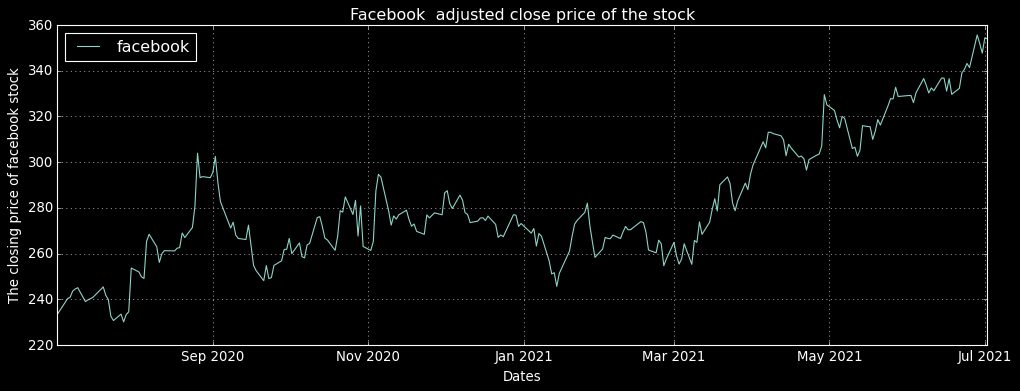

In [175]:
plt.style.use("dark_background")
plt.figure(figsize=(15,5))
plt.plot(adj_price,label='facebook')
plt.title('Facebook  adjusted close price of the stock')
plt.xlabel('Dates')
plt.ylabel('The closing price of facebook stock')
plt.legend(loc='best')
plt.grid()
plt.show()

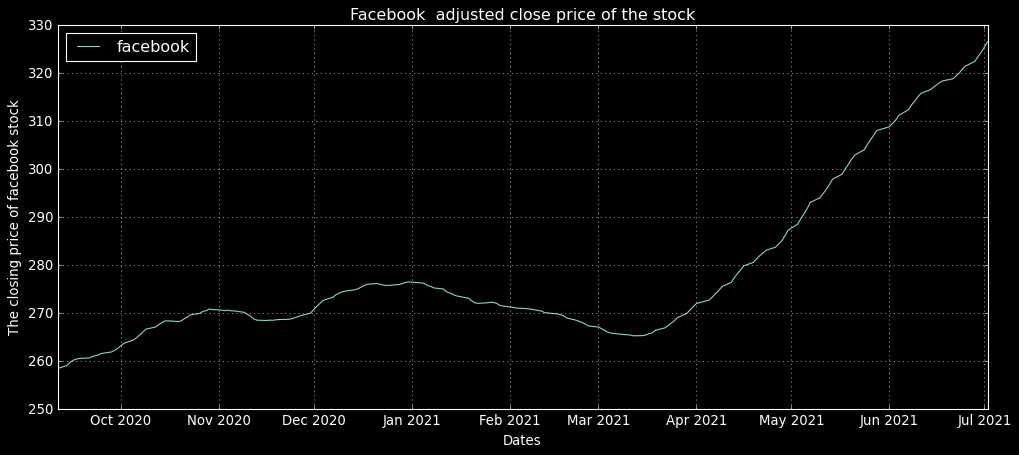

In [176]:
plt.figure(figsize=(15,6))
plt.plot(mav,label='facebook')
plt.title('Facebook  adjusted close price of the stock')
plt.xlabel('Dates')
plt.ylabel('The closing price of facebook stock')
plt.legend(loc='best')
plt.grid()
plt.show()

In [177]:
#initialize the short and long lookback period
# # short=50long=120
short_lb =50
long_lb=120


In [178]:
#initiliaze the new dataframe
signal_df = pd.DataFrame(index=data.index)
signal_df['signal'] = 0.0

In [179]:

signal_df['short_mav']=data['Adj Close'].rolling(window=short_lb,min_periods=1,center=False).mean()
signal_df['short_mav']

Date
2020-07-02    233.419998
2020-07-06    236.849998
2020-07-07    238.186666
2020-07-08    239.535000
2020-07-09    240.528000
                 ...    
2021-06-28    322.415999
2021-06-29    323.408999
2021-06-30    324.310199
2021-07-01    325.368599
2021-07-02    326.517000
Name: short_mav, Length: 253, dtype: float64

In [180]:
# signal_df['long_mav'] = data['Adj Close'].rolling(window=long_lb, min_periods=1, center=False).mean()
# signal_df['long_mav']
signal_df['long_lb_mav']=data['Adj Close'].rolling(window=long_lb,min_periods=1,center=False).mean()
signal_df['long_lb_mav']

Date
2020-07-02    233.419998
2020-07-06    236.849998
2020-07-07    238.186666
2020-07-08    239.535000
2020-07-09    240.528000
                 ...    
2021-06-28    294.967249
2021-06-29    295.705416
2021-06-30    296.363500
2021-07-01    297.087000
2021-07-02    297.896166
Name: long_lb_mav, Length: 253, dtype: float64

In [181]:
# signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > 
#                                           signal_df['long_mav'][short_lb:], 1.0, 0.0)   
signal_df['signal'][short_lb:]=np.where(signal_df['short_mav'] [short_lb:] >
                                      signal_df['long_lb_mav'][short_lb:],1.0,0.0)
signal_df['signal'][short_lb:]

Date
2020-09-14    1.0
2020-09-15    1.0
2020-09-16    1.0
2020-09-17    1.0
2020-09-18    1.0
             ... 
2021-06-28    1.0
2021-06-29    1.0
2021-06-30    1.0
2021-07-01    1.0
2021-07-02    1.0
Name: signal, Length: 203, dtype: float64

In [182]:
signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == -1.0]


,signal,short_mav,long_lb_mav,positions
Date,,,,
2021-02-03,0.0,271.048399,271.222917,-1.0


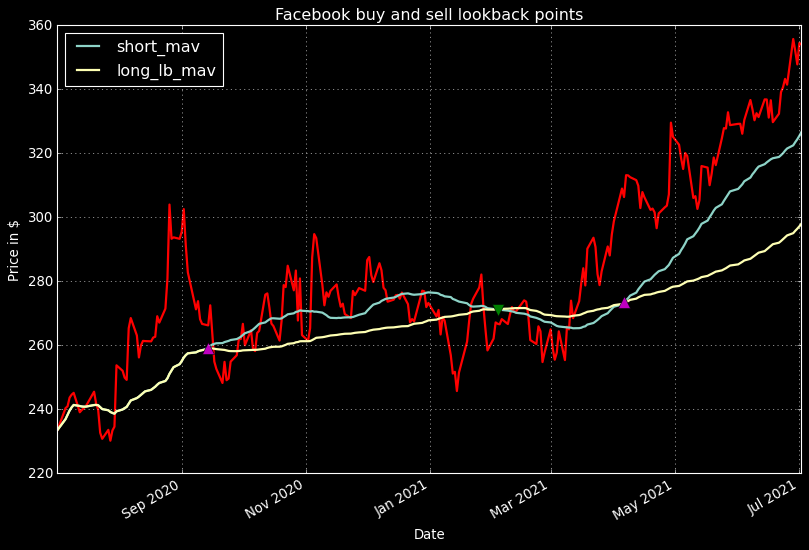

In [189]:

fig = plt.figure()
plt1 = fig.add_subplot(111,  ylabel='Price in $')
data['Adj Close'].plot(ax=plt1, color='r', lw=2.)
signal_df[['short_mav', 'long_lb_mav']].plot(ax=plt1, lw=2., figsize=(12,8))
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,
          signal_df.short_mav[signal_df.positions == -1.0],'v',markersize=10, color='green' )

plt1.plot(signal_df.loc[signal_df.positions == 1.0].index, signal_df.short_mav[signal_df.positions == 1.0]
          ,'^', markersize=10, color='m') 
plt.title("Facebook buy and sell lookback points")
plt.grid()
plt.show()



In [87]:
signal_df.loc[signal_df.positions == -1.0].index,signal_df.short_mav[signal_df.positions == -1.0]

(DatetimeIndex(['2021-02-03'], dtype='datetime64[ns]', name='Date', freq=None),
 Date
 2021-02-03    271.048399
 Name: short_mav, dtype: float64)

In [88]:
signal_df.loc[signal_df.positions == 1.0].index, signal_df.short_mav[signal_df.positions == 1.0]

(DatetimeIndex(['2020-09-14', '2021-04-06'], dtype='datetime64[ns]', name='Date', freq=None),
 Date
 2020-09-14    259.074201
 2021-04-06    273.328800
 Name: short_mav, dtype: float64)

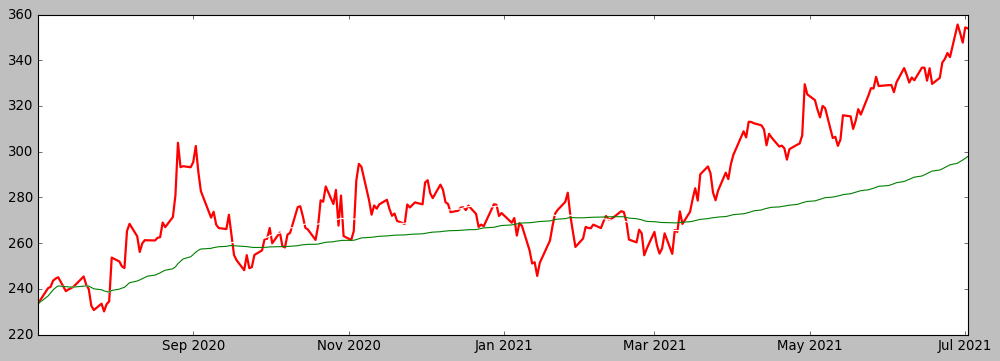

In [152]:
# plt.style.use('classic')
plt.figure(figsize=(15,5))
plt.plot(data['Adj Close'],color='r',lw=2)
plt.plot(signal_df['short_mav'],color='white')
plt.plot(signal_df['long_lb_mav'],color='green')
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,signal_df.short_mav[signal_df.positions == -1.0],'v',
          markersize=10, color='k')
plt1.plot(signal_df.loc[signal_df.positions == 1.0].index, signal_df.short_mav[signal_df.positions == 1.0],'^', 
          markersize=10, color='m')